 IMPORT ALL NECESSARY LIBRARIES FOR DATA CLEANING,PREPROCESSING AND CLUSTERING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, inconsistent
from scipy.cluster.hierarchy import fcluster
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

UPLOAD THE DATASET TO THE NOTEBOOK USING PANDAS 

In [2]:
#Read the CSV file using pandas
germancredit = pd.read_csv('german_credit_data.csv')

USE A FEW FUNCTIONS TO DO A QUICK ANALYSIS OF THE DATA

In [3]:
#Check the first five rows in the dataset
germancredit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
#Check the important information in the dataset
germancredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [5]:
#Check a quick statistical review of the numerical columns in the dataset
germancredit.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [6]:
#Check for the missing values in the dataset
germancredit.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [7]:
#Replace missing values with the most frequent
catImputer = SimpleImputer(missing_values= np.nan, strategy = 'most_frequent')
catImputer = catImputer.fit(germancredit[['Saving accounts','Checking account']])
germancredit[['Saving accounts',
              'Checking account']] = catImputer.transform(germancredit[['Saving accounts','Checking account']])

In [8]:
#Check for the missing values
germancredit.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

EMPLOY THE LABELENCODER TO NORMALIZE THE ORDINAL CATEGORICAL VALUES INTO NUMERICAL VALUES

In [9]:
#encode categorical values into numerical values
le = LabelEncoder()
for col in germancredit.columns:
    if germancredit[col].dtype == 'object':
        germancredit[col] = le.fit_transform(germancredit[col])

In [10]:
#check the first 100 rows in the dataset
germancredit.head(100)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,1,2,1,0,0,1169,6,5
1,1,22,0,2,1,0,1,5951,48,5
2,2,49,1,1,1,0,0,2096,12,3
3,3,45,1,2,0,0,0,7882,42,4
4,4,53,1,2,0,0,0,4870,24,1
...,...,...,...,...,...,...,...,...,...,...
95,95,58,1,2,2,0,1,15945,54,0
96,96,61,0,2,1,0,0,2012,12,3
97,97,34,1,2,1,1,1,2622,18,0
98,98,36,1,2,1,0,1,2337,36,5


FURTHER CLEAN THE DATA BY DROPPING THE IRRELEVANT COLUMNS

In [11]:
#drop the irrelvant column
germancredit = germancredit.drop('Unnamed: 0', axis = 1)

In [12]:
germancredit.head(50)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
5,35,1,1,0,0,0,9055,36,3
6,53,1,2,1,2,0,2835,24,4
7,35,1,3,2,0,1,6948,36,1
8,61,1,1,1,3,0,3059,12,5
9,28,1,3,1,0,1,5234,30,1


THE RELATIONSHIPS BETWEEN SOME OF THE VARIABLES CAN BE VIEWED BY PLOTTING HISTOGRAMS AND SCATTERPLOTS

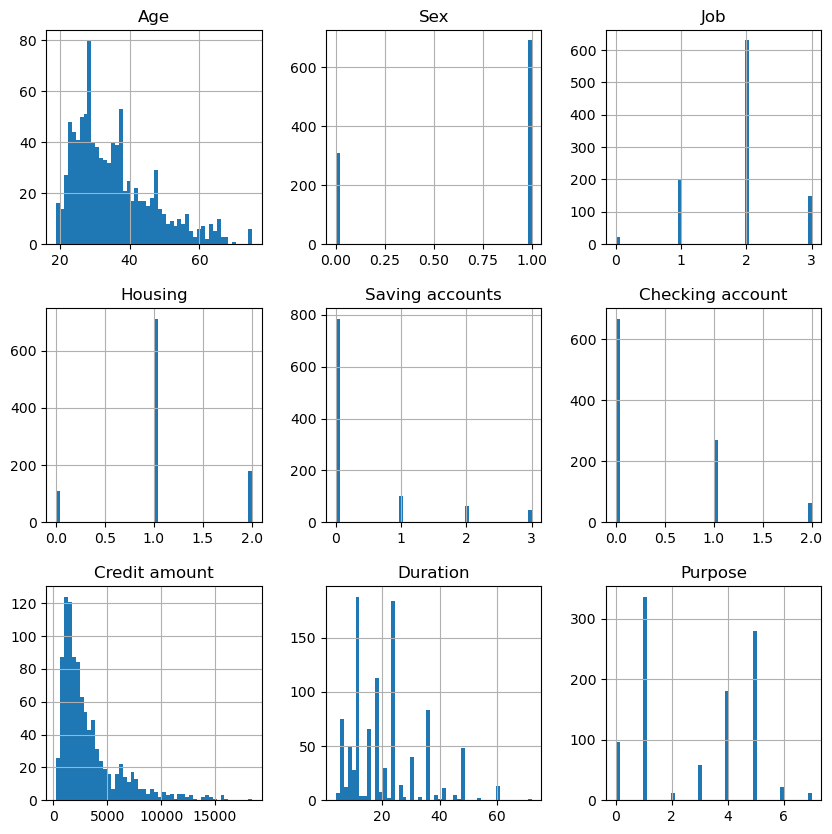

In [13]:
#plot histograms for the variables in the dataset
germancredit.hist(figsize = (10, 10), bins = 50)
plt.show()

CREATE A CORRELATION MATRIX OF THE VARIABLES IN THE DATASET

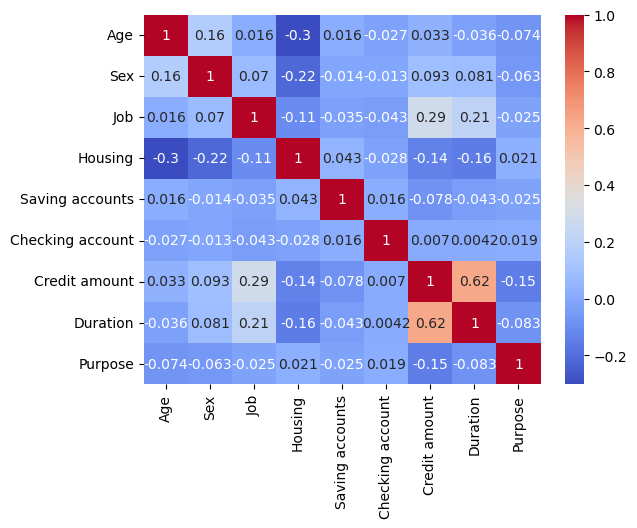

In [14]:
# Create a correlation matrix of the variables in the dataset
cormat = germancredit.corr()
sns.heatmap(cormat, annot = True, cmap = 'coolwarm')
plt.show()

PLOT A SCATTERPLOT OF JOB AGAINST CREDIT AMOUNT WHICH SHOWS THE RELATIONSHIP BETWEEN NUMBER OF JOBS AND CREDIT AMOUNT REQUESTED

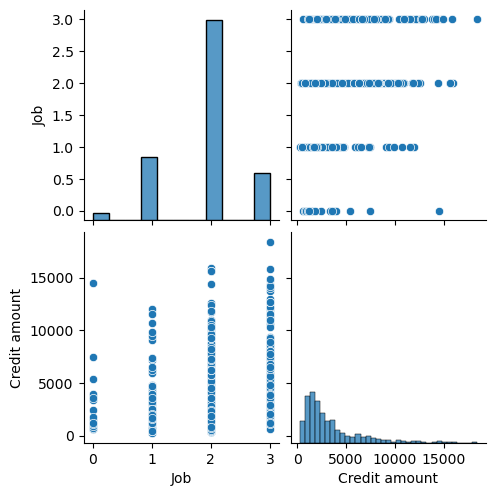

In [15]:
# Plot scatterplot of "Job" against "Credit amount"
sns.pairplot(germancredit.iloc[:,[2,6]])

THE RELATIONSHIP BETWEEN HOUSING TYPE AND PURPOSE OF THE CREDIT TAKEN IS ALSO EXPLORED

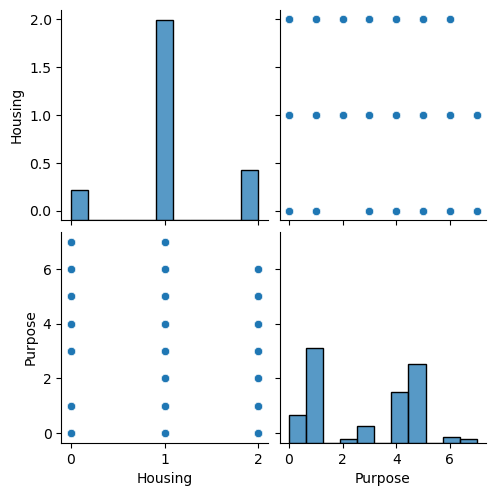

In [16]:
# Plot scatterplot of "Housing" against "Purpose"
sns.pairplot(germancredit.iloc[:, [3,8]])

CREATE A BOXPLOT TO VIEW THE OUTLIERS IN THE DATASET

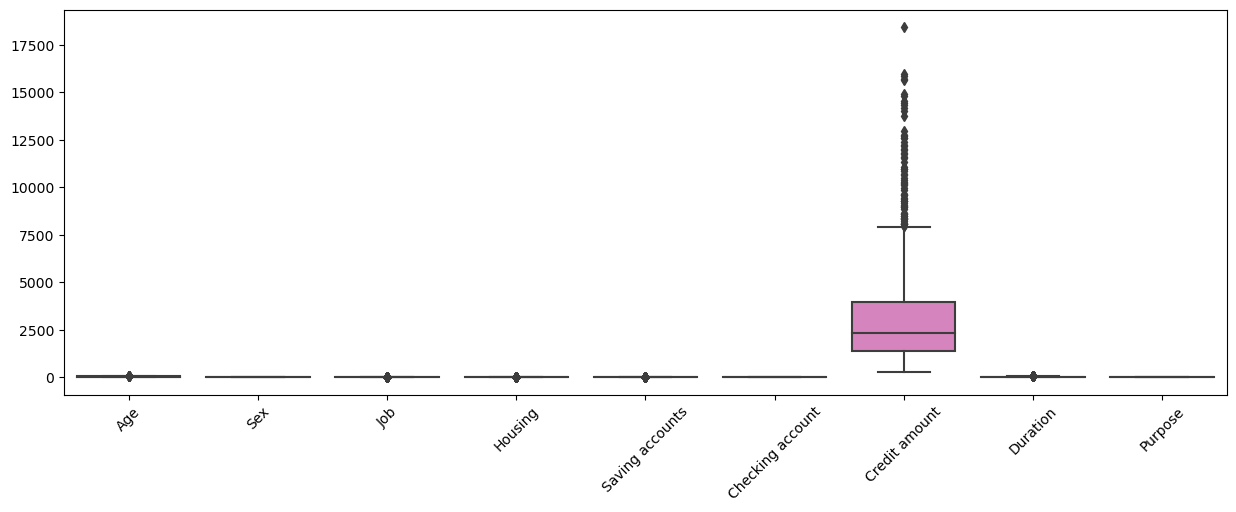

In [17]:
#Create a boxplot to view outliers in the dataset
plt.figure(figsize=(15,5))
sns.boxplot(data = germancredit)
plt.xticks(rotation = 45)
plt.show()

Distribution of 'Credit amount'

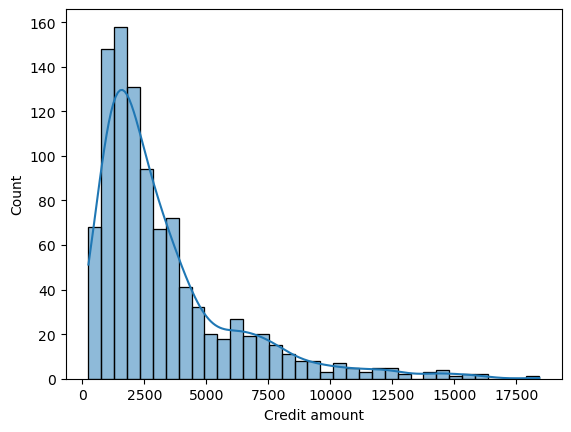

In [18]:
#Plot the distribution of Credit amount
sns.histplot(data = germancredit, x = 'Credit amount', kde = True)
plt.show()

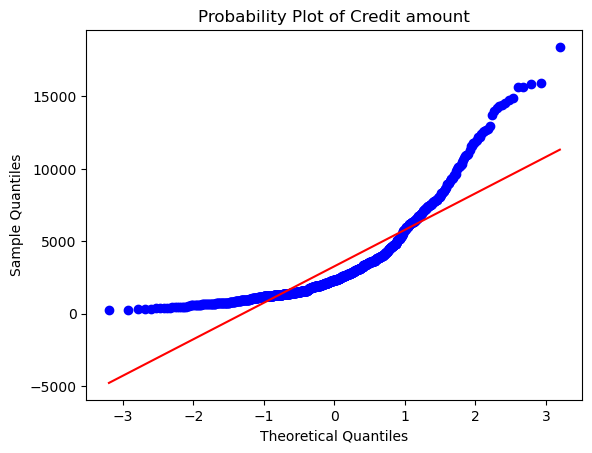

In [19]:
#Plot a probability plot og Credit amount
stats.probplot(germancredit['Credit amount'], plot = plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Probability Plot of Credit amount')
plt.show()

THE DATA IS SKEWED AND NON-GAUSSIAN SO WE USE THE IQR METHOD TO GET RID OF THE OUTLIERS

In [20]:
#Use the IQR method to remove outliers
Q1 = germancredit.quantile(0.25)
Q3 = germancredit.quantile(0.75)
IQR = Q3 - Q1
germancredit_no_outliers = germancredit[~((germancredit < (Q1 - 1.5 * IQR)) |
                                          (germancredit > (Q3 + 1.5 * IQR))).any(axis = 1)]

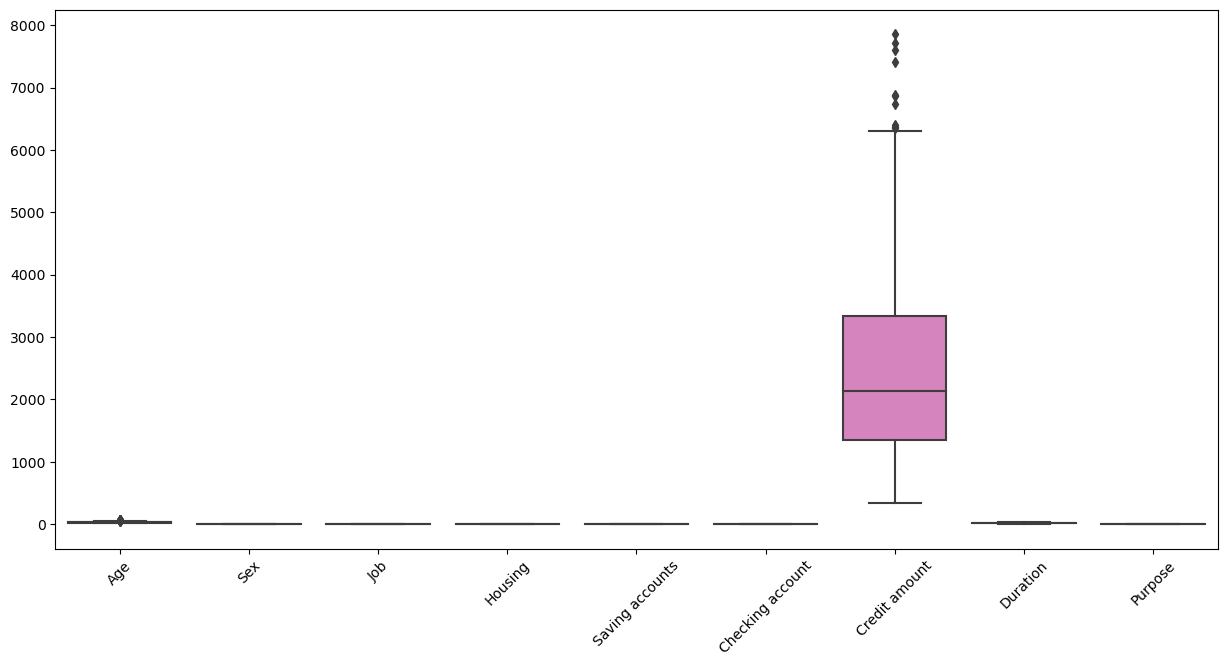

In [21]:
#Create a boxplot to view outliers
plt.figure(figsize=(15,7))
sns.boxplot(data = germancredit_no_outliers)
plt.xticks(rotation = 45)
plt.show()

THE NUMERICAL VALUES ARE NORMALIZED USING THE STANDARD SCALER

In [22]:
#Normalize the data using Standard Scaler
Sc = StandardScaler()
germancredit_sc = Sc.fit_transform(germancredit_no_outliers)


In [23]:
germancredit_sc

array([[-1.23948912, -1.5       ,  0.        , ..., -0.60549221,
        -0.80010998,  0.88388037],
       [ 1.9120195 ,  0.66666667,  0.        , ..., -0.06390829,
         0.52891033,  0.88388037],
       [ 1.40371166,  0.66666667,  0.        , ..., -0.24717473,
        -1.13236506, -1.20134212],
       ...,
       [-0.12121187,  0.66666667,  0.        , ...,  2.3785909 ,
         2.52244079, -1.72264775],
       [ 1.6070348 ,  0.66666667,  0.        , ..., -0.0853947 ,
        -0.80010998, -1.20134212],
       [ 0.38709597,  0.66666667,  0.        , ..., -1.08767251,
        -0.80010998,  0.88388037]])

FEATURE EXTRACTION

In [24]:
#Perform Feature Extraction using PCA
pca = PCA(n_components = 2)
pca_germancredit = pca.fit_transform(germancredit_sc)

pca_germ = pd.DataFrame(data = pca_germancredit, columns = ['PC1', 'PC2'])

TO IMPLEMENT THE KMEANS CLUSTERING, THE VALUE OF K(THE NUMBER OF CLUSTERS) IS FIRST DETERMINED. IN THIS CASE, THE SILHOUETTE METHOD IS USED FOR THIS

In [25]:
#Determine the optimal number of clusters using the silhouette method
scores = []
cluster_range = range(2, 12)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(pca_germ)
    scores.append(silhouette_score(pca_germ, kmeans.labels_))
   
best_n_clusters = cluster_range[scores.index(max(scores))]

print(f'The optimal number of clusters is {best_n_clusters}.')

The optimal number of clusters is 3.


RUN K-MEANS ALGORITHM ON THE DATA

In [26]:
#Run Kmeans algorithm on the data
kmeans = KMeans(n_clusters = best_n_clusters, init = 'k-means++', max_iter= 300, n_init= 'auto', random_state= 42)
kmeans.fit(pca_germ)

KMeans(n_clusters=3, n_init='auto', random_state=42)

ADD THE CLUSTERS TO THE DATASET

In [27]:
#Add clusters to the dataset
germancredit_no_outliers['KmeansCluster'] = kmeans.labels_

C:\Users\USER\AppData\Local\Temp\ipykernel_23048\3693022008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germancredit_no_outliers['KmeansCluster'] = kmeans.labels_


In [28]:
germancredit_no_outliers.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,KmeansCluster
12,22,0,2,1,0,1,1567,12,5,2
16,53,1,2,1,0,0,2424,24,5,0
20,48,1,2,1,0,0,2134,9,1,0
24,26,1,2,1,0,0,2069,10,4,2
28,34,1,2,1,0,1,2415,7,5,2


THE CLUSTERS ARE VISUALIZED BY USING THE PCA COMPONENTS AS SELECT DATA POINTS

In [29]:
germancredit_no_outliers.KmeansCluster.value_counts()

2    129
0    101
1     82
Name: KmeansCluster, dtype: int64

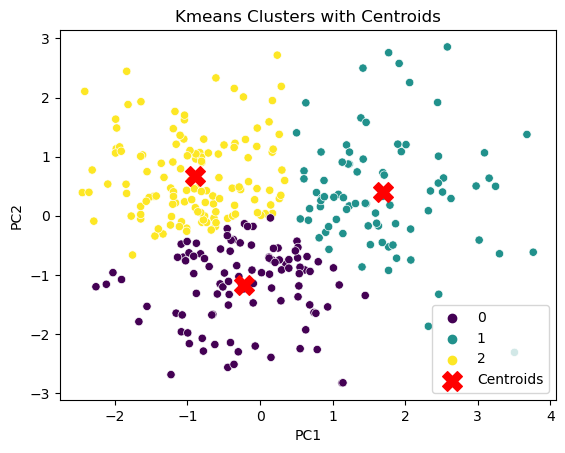

In [30]:
#Visualize the clusters
centroids = kmeans.cluster_centers_
sns.scatterplot(x = 'PC1', y = 'PC2', hue = kmeans.labels_, data = pca_germ, palette= 'viridis')
plt.scatter(centroids[:, 0], centroids[:,1], c = 'red', marker = 'X', s = 200, label = 'Centroids')
plt.title('Kmeans Clusters with Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

OBTAIN A BRIEF REPRESENTATION OF THE CLUSTERS TO GAIN INSIGHTS OF THE CLUSTERS

In [31]:
#Calculate the cluster statistics
grouped_data_kmeans = germancredit_no_outliers.groupby('KmeansCluster')
cluster_means_kmeans = grouped_data_kmeans.mean()
print(cluster_means_kmeans)

                     Age       Sex  Job  Housing  Saving accounts  \
KmeansCluster                                                       
0              42.336634  0.861386  2.0      1.0              0.0   
1              33.024390  0.853659  2.0      1.0              0.0   
2              28.558140  0.457364  2.0      1.0              0.0   

               Checking account  Credit amount   Duration   Purpose  
KmeansCluster                                                        
0                      0.089109    1970.940594  16.019802  2.495050  
1                      0.439024    4416.853659  30.024390  3.195122  
2                      0.527132    1756.534884  14.868217  4.007752  


RUN HIERARCHICAL (AGGLOMERATIVE) CLUSTERING ON THE DATASET

USE DENDROGRAM TO DETERMINE THE OPTIMAL NUMBER OF CLUSTERS

In [32]:
linkage_mat = linkage(germancredit_sc, method = 'ward')

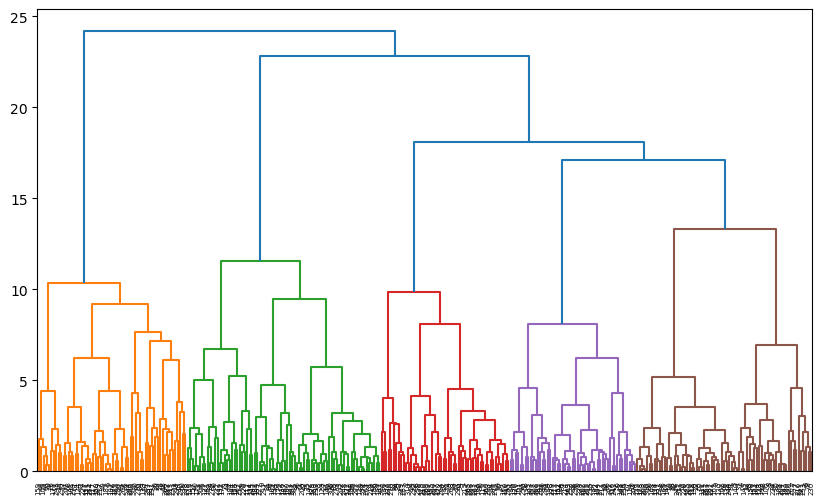

In [33]:
#Plot the dendrogram
plt.figure(figsize = (10,6))
dendrogram(linkage_mat)
plt.show()

In [34]:
#Perform heirarchical clustering using Agglomerative Clustering and add the clusters to the dataset
agglo = AgglomerativeClustering(n_clusters = 6).fit(pca_germ)
germancredit_no_outliers['AggloCluster'] = agglo.labels_

C:\Users\USER\AppData\Local\Temp\ipykernel_23048\2486960712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germancredit_no_outliers['AggloCluster'] = agglo.labels_


In [35]:
germancredit_no_outliers.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,KmeansCluster,AggloCluster
12,22,0,2,1,0,1,1567,12,5,2,3
16,53,1,2,1,0,0,2424,24,5,0,2
20,48,1,2,1,0,0,2134,9,1,0,2
24,26,1,2,1,0,0,2069,10,4,2,4
28,34,1,2,1,0,1,2415,7,5,2,3


In [36]:
germancredit_no_outliers.AggloCluster.value_counts()

2    75
3    63
0    54
4    52
1    47
5    21
Name: AggloCluster, dtype: int64

VISUALIZE THE AGGLOMERATIVE CLUSTERS USING THE DURATION AND CREDIT AMOUNT AS SELECT DATA POINTS

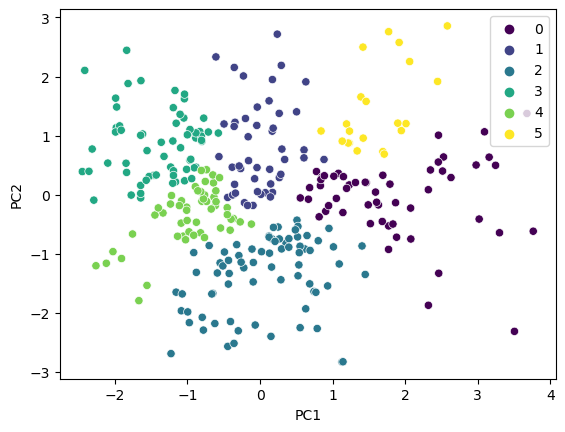

In [37]:
#visualize the agglomerative clusters
sns.scatterplot(data = pca_germ, x = 'PC1', y = 'PC2', hue = agglo.labels_, palette= 'viridis')
plt.show()

In [38]:
#Calculate the cluster statistics
grouped_data_agglo = germancredit_no_outliers.groupby('AggloCluster')
cluster_means_agglo = grouped_data_agglo.mean()
print(cluster_means_agglo)

                    Age       Sex  Job  Housing  Saving accounts  \
AggloCluster                                                       
0             34.481481  0.907407  2.0      1.0              0.0   
1             28.659574  0.574468  2.0      1.0              0.0   
2             43.813333  0.946667  2.0      1.0              0.0   
3             28.079365  0.333333  2.0      1.0              0.0   
4             34.038462  0.634615  2.0      1.0              0.0   
5             30.190476  0.714286  2.0      1.0              0.0   

              Checking account  Credit amount   Duration   Purpose  \
AggloCluster                                                         
0                     0.203704    4618.018519  29.537037  2.648148   
1                     0.553191    2482.468085  21.914894  4.021277   
2                     0.053333    2212.146667  17.306667  2.266667   
3                     0.619048    1433.888889  11.730159  4.444444   
4                     0.211538    1

COMPARE THE PERFORMANCE OF THE CLUSTERING ALGORITHMS USING SILHOUETTE SCORE AND DAVIES-BOULDING INDEX

In [39]:
# Silhouette Score
silhouette_kmeans = silhouette_score(pca_germ, kmeans.labels_)
silhouette_agg = silhouette_score(pca_germ, agglo.labels_)

# Davies-Bouldin Score
db_kmeans = davies_bouldin_score(pca_germ, kmeans.labels_)
db_agg = davies_bouldin_score(pca_germ, agglo.labels_)

print("KMeans: Silhouette Score :", silhouette_kmeans, "Davies-Bouldin Score :", db_kmeans)
print("Agglomerative: Silhouette Score :", silhouette_agg, "Davies-Bouldin Score :", db_agg)

KMeans: Silhouette Score : 0.3866637658722047 Davies-Bouldin Score : 0.8706961030384254
Agglomerative: Silhouette Score : 0.27603941326486786 Davies-Bouldin Score : 1.0341636110064059
